# Fourierov integral

Primjer snimanja signala, numeričkog računanja Fourierovog integrala, i rekonstrukcije 
signala nakon rezanja frekvencija.

In [1]:
using PortAudio, SampledSignals, LibSndFile
using FileIO: load, save, loadstreaming, savestreaming
using QuadGK

┌ Info: Precompiling LibSndFile [b13ce0c6-77b0-50c6-a2db-140568b8d1a5]
└ @ Base loading.jl:1260
┌ Info: Precompiling QuadGK [1fd47b50-473d-5c70-9696-f719f8f3bcdc]
└ @ Base loading.jl:1260


In [2]:
PortAudio.devices()

15-element Array{PortAudio.PortAudioDevice,1}:
 PortAudio.PortAudioDevice("Microsoft Sound Mapper - Input", "MME", 2, 0, 44100.0, 0, 0.09, 0.09, 0.18, 0.18)
 PortAudio.PortAudioDevice("Microphone (BRIO 4K Stream Edit", "MME", 2, 0, 44100.0, 1, 0.09, 0.09, 0.18, 0.18)
 PortAudio.PortAudioDevice("Microphone (Realtek High Defini", "MME", 2, 0, 44100.0, 2, 0.09, 0.09, 0.18, 0.18)
 PortAudio.PortAudioDevice("Microsoft Sound Mapper - Output", "MME", 0, 2, 44100.0, 3, 0.09, 0.09, 0.18, 0.18)
 PortAudio.PortAudioDevice("Speaker/Headphone (Realtek High", "MME", 0, 2, 44100.0, 4, 0.09, 0.09, 0.18, 0.18)
 PortAudio.PortAudioDevice("Speakers ()", "Windows WDM-KS", 0, 2, 44100.0, 5, 0.01, 0.01, 0.08533333333333333, 0.08533333333333333)
 PortAudio.PortAudioDevice("Microphone (Realtek HD Audio Mic input)", "Windows WDM-KS", 2, 0, 44100.0, 6, 0.01, 0.01, 0.04, 0.04)
 PortAudio.PortAudioDevice("Mic in at front panel (black) (Mic in at front panel (black))", "Windows WDM-KS", 2, 0, 44100.0, 7, 0.01, 0.0

Nakon što ste pronašli vaše uređaje, možete otkomentirati sljedeću 
ćeliju u kojoj se ulaz s mikrofona direktno prenosi na zvučnik. 
Nakon toga treba ponovo pokrenuti jezgru. 

In [3]:
#=
stream = PortAudioStream(2, 2)
try
    # cancel with Ctrl-C
    write(stream, stream)
finally
    close(stream)
end
=#

Ukoliko želite snimiti svoj tekst, zamijenite mikrofon i izlaz s vašim uređajima, i izvedite sljedeće četiri čelije.

In [6]:
# stream = PortAudioStream("Microphone (BRIO 4K Stream Edit","Microsoft Sound Mapper - Output")

PortAudioStream{Float32}
  Samplerate: 44100.0Hz

  2 channel sink: "Microsoft Sound Mapper - Output"
  2 channel source: "Microphone (BRIO 4K Stream Edit"

In [7]:
# Namjestite duljinu snimke (nemojte pretjerivati)
# buf = read(stream, 2s)

88200-frame, 2-channel SampleBuf{Float32, 2}
2.0s sampled at 44100.0Hz
▁▃▂▁▁▁▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▄▅▅▅▅▅▅▅▅▅▆▅▄▄▄▄▅▅▄▄▄▄▄▄▅▅▅▅▄▅▅▅▅▅▅▄▄▄▄▃▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▄
▁▃▂▁▁▁▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▄▅▅▅▅▅▅▅▅▅▆▅▄▄▄▄▅▅▄▄▄▄▄▄▅▅▅▅▄▅▅▅▅▅▅▄▄▄▄▃▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▄

In [8]:
# Zatvorite stream
# close(stream)

In [9]:
# Spremite vašu snimku
# save("myvoice.wav", buf)

In [3]:
glas=load("myvoice.wav")

88200-frame, 2-channel SampleBuf{Float32, 2}
2.0s sampled at 44100.0Hz
▁▃▂▁▁▁▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▄▅▅▅▅▅▅▅▅▅▆▅▄▄▄▄▅▅▄▄▄▄▄▄▅▅▅▅▄▅▅▅▅▅▅▄▄▄▄▃▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▄
▁▃▂▁▁▁▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▄▅▅▅▅▅▅▅▅▅▆▅▄▄▄▄▅▅▄▄▄▄▄▄▅▅▅▅▄▅▅▅▅▅▅▄▄▄▄▃▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▄

In [4]:
length(glas)

176400

In [5]:
glas.samplerate

44100.0

In [6]:
typeof(glas)

SampleBuf{Float32,2}

In [7]:
# Napravimo mono snimku
glas_mono=similar(glas)

InexactError: InexactError: trunc(Int64, NaN)

In [8]:
glas_mono.data=sum(glas.data,dims=2)
glas_mono.samplerate=glas.samplerate

44100.0

In [9]:
save("myvoice_mono.wav", glas_mono)

In [10]:
glas_mono.data

88200×1 Array{Float32,2}:
 -0.00015258789
 -9.1552734f-5
 -6.1035156f-5
 -9.1552734f-5
 -3.0517578f-5
  6.1035156f-5
  0.00015258789
  9.1552734f-5
  0.0
  0.0
  0.0
  3.0517578f-5
  0.0
  ⋮
 -3.0517578f-5
 -0.0011291504
 -0.0039367676
 -0.006164551
 -0.007843018
 -0.009490967
 -0.011474609
 -0.0146484375
 -0.018371582
 -0.020141602
 -0.0211792
 -0.023773193

In [11]:
# Pogledajmo signal
using Plots

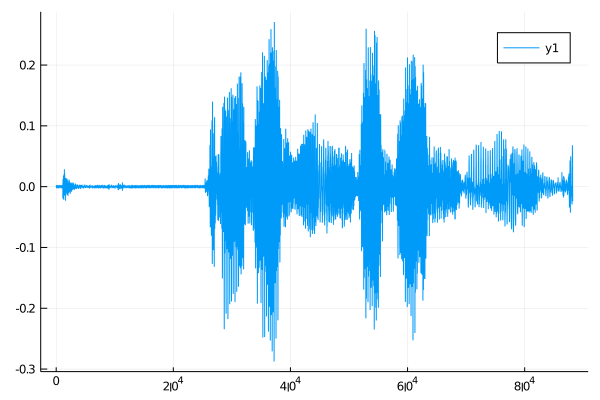

In [12]:
S=glas_mono.data
plot(S)

In [25]:
T=range(0,2,length=length(S))

0.0:2.2675994058889557e-5:2.0

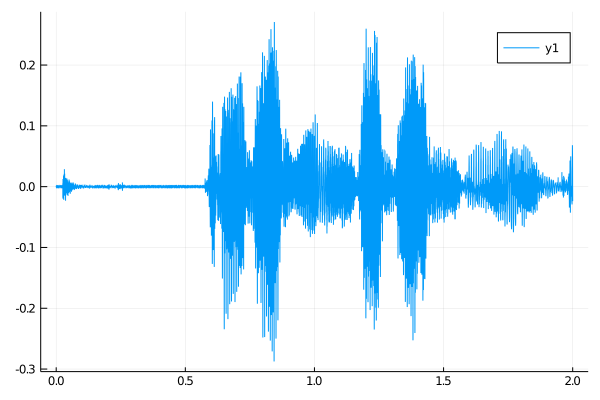

In [26]:
plot(T,S)

In [27]:
# Trapezna formula, približno. Računamo kosinusni i sinusni spektar
using LinearAlgebra
A(λ::Float64)=(cos.(λ*T)⋅S)*((T[end]-T[1])/(length(T)*π))
B(λ::Float64)=(sin.(λ*T)⋅S)*((T[end]-T[1])/(length(T)*π))

B (generic function with 1 method)

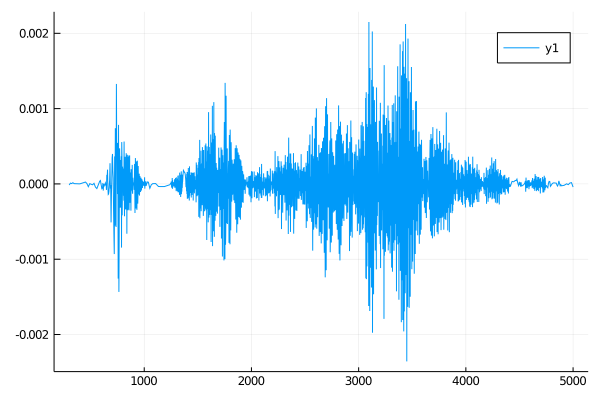

In [28]:
# Nacrtajmo kosinusni spektar i odlučimo gdje koje frekvencije ćemo zadržati
plot(B,300,5000)

In [29]:
# Ograničimo spektar, opet koristimo približnu formulu
λ₀=600.0
λ₁=4500.0
step=0.5
Λ=range(λ₀,λ₁,step=step)
# Ovo traje cca 1 minutu, ali se računa samo jednom
Aλ=A.(Λ)
Bλ=B.(Λ)

7801-element Array{Float64,1}:
 -1.4276545343692649e-5
  6.9369216861432245e-6
  2.112717985256516e-5
  3.123817843795039e-5
  4.1020107290376104e-5
  4.6898213248294996e-5
  3.876846443879242e-5
  1.0373092159497102e-5
 -3.040583150749619e-5
 -6.26014173311179e-5
 -6.625478447345567e-5
 -3.870254324568669e-5
  1.4653952013808025e-6
  ⋮
  1.7794981642116358e-5
  9.992730104962406e-7
 -1.277551704963596e-5
 -1.5925982443486848e-5
 -4.188816410633976e-6
  1.9864473329428913e-5
  4.641590648579104e-5
  6.2524350825799e-5
  5.901390212558618e-5
  3.584836468909258e-5
  2.2516323865110587e-6
 -2.8636014669379933e-5

In [167]:
g(x::Float64)=(Aλ⋅cos.(x*Λ)+Bλ⋅sin.(x*Λ))*step

g (generic function with 2 methods)

In [30]:
# Rekonstruirajmo signal s odrezanim frekvencijama
g(x::Float64)=(Aλ⋅cos.(x*Λ)+Bλ⋅sin.(x*Λ))*step
G=g.(T)

88200-element Array{Float64,1}:
  0.000184805327142117
  0.00022355499304577928
  0.00026082494707742234
  0.0002962364964993873
  0.00032942895326896885
  0.0003600634641776046
  0.00038782662073811507
  0.0004124338106432171
  0.00043363227525326325
  0.0004512038405850413
  0.0004649672926284134
  0.0004747803714866872
  0.00048054136277459234
  ⋮
  0.0014759800471028286
 -0.00017988954098602
 -0.0017398810480251034
 -0.003200230175866396
 -0.00455783291565055
 -0.005810252841406547
 -0.006955723797088994
 -0.007993148002196426
 -0.008922089635965701
 -0.009742763993387377
 -0.010456022339221955
 -0.011063332617785724

In [31]:
# Usporedimo grafički
plot(T,[S G],layout=(2,1))

In [35]:
# Spremimo signal s odrezanim frekvencijama i poslušajmo
glas_mono_odrezan=deepcopy(glas_mono)
glas_mono_odrezan.data[:,1]=map(Float32,G)
save("myvoice_odrezan.wav", glas_mono_odrezan)

In [33]:
glas_mono_odrezan

88200-frame, 1-channel SampleBuf{Float32, 2}
2.0s sampled at 44100.0Hz
▂▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▆▅▆▆▆▅▅▆▆▆▆▅▅▅▅▅▅▅▄▄▃▃▅▆▆▆▆▄▅▆▆▆▆▅▅▄▄▃▃▄▅▅▅▅▅▅▅▅▅▅▄▄▃▃▃▅